Genome length: 5682322
Number of kmers for size 10: 5682313
DataFrame head for k=10:
         kmer  count
0  AAAAAAAAAA      2
1  AAAAAAAAAC     13
2  AAAAAAAAAG     17
3  AAAAAAAAAT      8
4  AAAAAAAACA     19
count
1      39365
2      43085
3      42895
4      39966
5      36322
       ...  
605        1
608        1
640        1
707        1
821        1
Length: 344, dtype: int64
DataFrame saved to kmer_frequencies_k10.csv
K-mer frequencies saved to kmer_frequencies_k10.txt
Basic statistics:
               count
count  495704.000000
mean       11.462988
std        15.842839
min         1.000000
25%         3.000000
50%         7.000000
75%        14.000000
max       821.000000


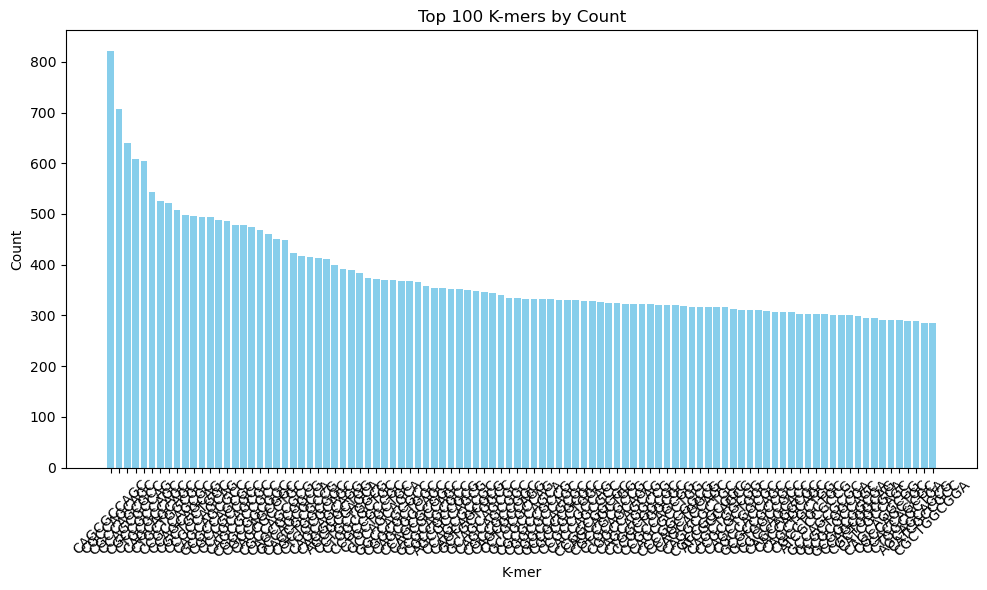

Number of kmers for size 11: 5682312
DataFrame head for k=11:
          kmer  count
0  AAAAAAAAAAG      1
1  AAAAAAAAAAT      1
2  AAAAAAAAACA      3
3  AAAAAAAAACC      6
4  AAAAAAAAACG      2
count
1      479381
2      314636
3      201183
4      130418
5       87168
        ...  
257         1
263         2
306         1
312         1
346         1
Length: 191, dtype: int64
DataFrame saved to kmer_frequencies_k11.csv
K-mer frequencies saved to kmer_frequencies_k11.txt
Basic statistics:
              count
count  1.485317e+06
mean   3.825608e+00
std    5.175966e+00
min    1.000000e+00
25%    1.000000e+00
50%    2.000000e+00
75%    4.000000e+00
max    3.460000e+02


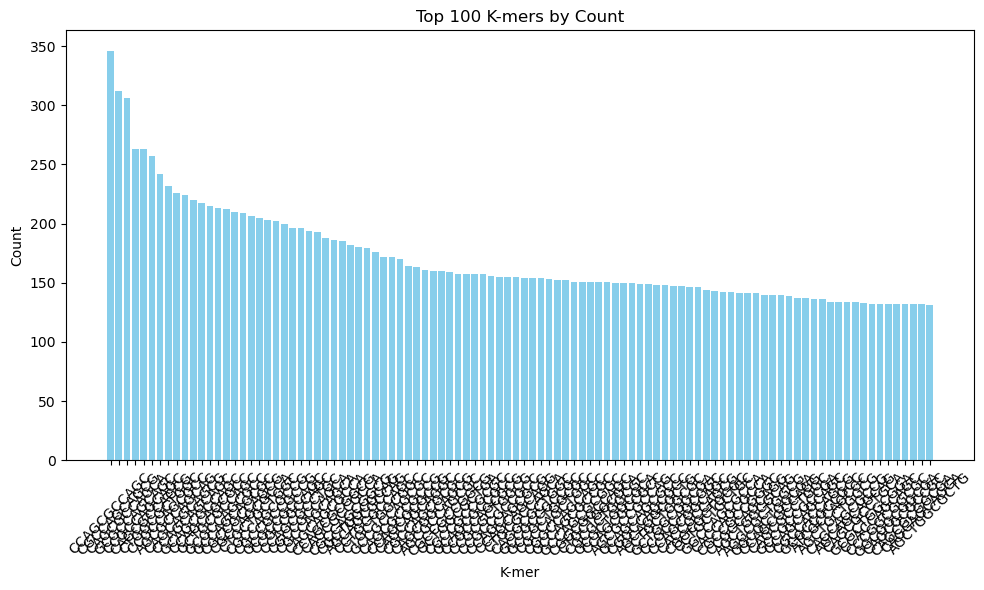

Number of kmers for size 12: 5682311
DataFrame head for k=12:
           kmer  count
0  AAAAAAAAAAGC      1
1  AAAAAAAAAATC      1
2  AAAAAAAAACAA      1
3  AAAAAAAAACAC      1
4  AAAAAAAAACAG      1
count
1      1801004
2       619339
3       250552
4       117530
5        61952
        ...   
129          1
131          1
134          1
139          1
174          1
Length: 105, dtype: int64
DataFrame saved to kmer_frequencies_k12.csv
K-mer frequencies saved to kmer_frequencies_k12.txt
Basic statistics:
              count
count  2.973159e+06
mean   1.911177e+00
std    2.040396e+00
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    2.000000e+00
max    1.740000e+02


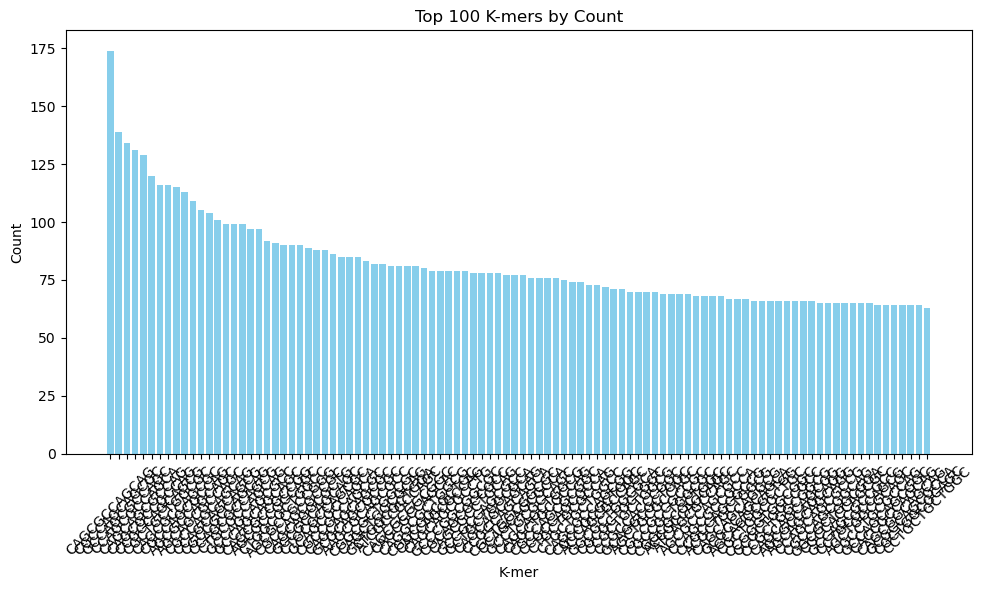

Number of kmers for size 13: 5682310
DataFrame head for k=13:
            kmer  count
0  AAAAAAAAAAGCG      1
1  AAAAAAAAAATCG      1
2  AAAAAAAAACAAA      1
3  AAAAAAAAACACT      1
4  AAAAAAAAACAGC      1
count
1     3406289
2      575964
3      152131
4       54242
5       23587
       ...   
68          1
71          1
72          1
75          1
83          2
Length: 65, dtype: int64
DataFrame saved to kmer_frequencies_k13.csv
K-mer frequencies saved to kmer_frequencies_k13.txt
Basic statistics:
              count
count  4.252998e+06
mean   1.336052e+00
std    9.865493e-01
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    1.000000e+00
max    8.300000e+01


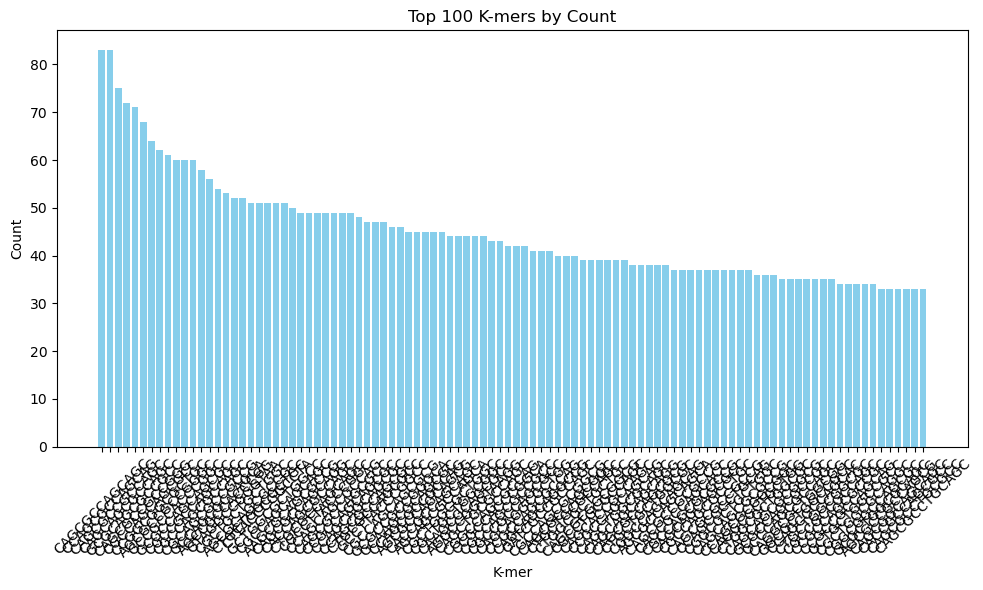

Number of kmers for size 14: 5682309
DataFrame head for k=14:
             kmer  count
0  CAGCGCGGGCGTCA      1
1  CAGCTTCGACGAGG      1
2  AATGTTAACATTCT      1
3  CAATGTCTATGGCA      1
4  CAGGACTGCGCCTG      1
count
1     4540194
2      356750
3       63656
4       18142
5        6426
6        4109
7        3152
8        6904
9        1417
10        601
11        226
12        178
13        106
14         57
15         54
16         27
17         24
18         26
19         23
20         19
21         15
22         12
23          8
24          6
25          5
26          5
27          3
28          4
29          5
30          1
32          2
36          1
38          1
40          2
41          1
42          1
43          3
44          1
46          1
50          2
51          3
54          2
dtype: int64
DataFrame saved to kmer_frequencies_k14.csv
K-mer frequencies saved to kmer_frequencies_k14.txt
Basic statistics:
              count
count  5.002175e+06
mean   1.135949e+00
std    

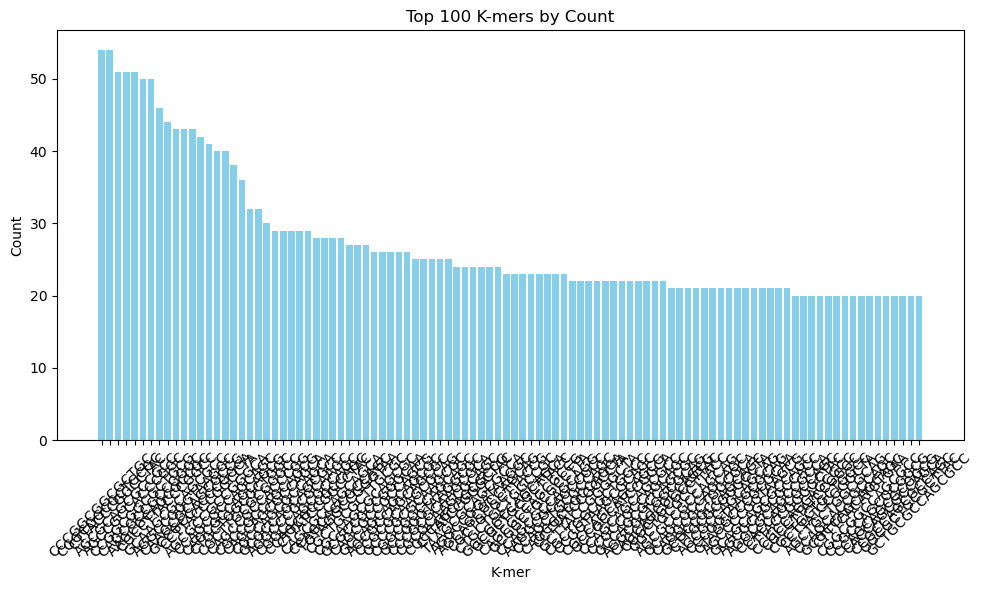

K-mer counts based on genome length:
Hello
   kmer_size  number_of_kmers
0         10          5682313
1         11          5682312
2         12          5682311
3         13          5682310
4         14          5682309


In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

# Set working directory
wd = '/Users/gopal/Desktop/Research/KlebPneum'
os.chdir(wd)

def convert_fasta_to_single_line(input_file, output_file):
    """Convert a multi-line FASTA file to a single-line format."""
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        header, sequence = None, []
        for line in infile:
            line = line.strip()
            if line.startswith(">"):
                if header:
                    outfile.write(header + '\n')
                    outfile.write(''.join(sequence) + '\n')
                header = line
                sequence = []
            else:
                sequence.append(line)
        if header:
            outfile.write(header + '\n')
            outfile.write(''.join(sequence) + '\n')

def read_genome_length(fasta_file):
    """Read the genome sequence and return its length."""
    length = 0
    try:
        with open(fasta_file, 'r') as infile:
            for line in infile:
                if not line.startswith(">"):  # Skip header lines
                    length += len(line.strip())
        print(f"Genome length: {length}")
    except Exception as e:
        print(f"Error reading genome length: {e}")
    return length

def count_kmers(genome_length, kmer_size):
    """Count the number of k-mers possible in the genome."""
    if genome_length < kmer_size:
        return 0
    no_of_kmers = (genome_length - kmer_size) + 1
    print(f"Number of kmers for size {kmer_size}: {no_of_kmers}")
    return no_of_kmers

def read_kmer_counts(file_path):
    """Read k-mer counts from a Jellyfish dump file."""
    kmers, counts = [], []
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        return kmers, counts

    with open(file_path, 'r') as file:
        current_count = None
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                try:
                    current_count = int(line[1:])  # Extract count after '>'
                except ValueError:
                    print(f"Skipping malformed header line: {line}")
                    current_count = None
            elif line:
                if current_count is not None:
                    kmers.append(line)
                    counts.append(current_count)
                else:
                    print(f"Skipping k-mer line '{line}' without a preceding count.")
                    
    return kmers, counts

def create_dataframe(kmers, counts):
    """Create a DataFrame from k-mer lists."""
    return pd.DataFrame({'kmer': kmers, 'count': counts})

def save_to_csv(df, filename):
    """Save DataFrame to CSV file."""
    df.to_csv(filename, index=False)
    print(f"DataFrame saved to {filename}")

def save_to_txt(df, filename):
    """Save k-mer frequencies to a text file."""
    with open(filename, 'w') as file:
        for _, row in df.iterrows():
            file.write(f"{row['kmer']}\t{row['count']}\n")
    print(f"K-mer frequencies saved to {filename}")

def plot_top_kmers(df, n=100):
    """Plot the top n k-mers by count."""
    if df.empty:
        print("DataFrame is empty. No data to plot.")
        return

    df_sorted = df.sort_values(by='count', ascending=False)
    top_kmers = df_sorted.head(n)

    plt.figure(figsize=(10, 6))
    plt.bar(top_kmers['kmer'], top_kmers['count'], color='skyblue')
    plt.xlabel('K-mer')
    plt.ylabel('Count')
    plt.title(f'Top {n} K-mers by Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    input_file = 'kpkmergenome.fasta'
    output_fasta_file = 'output.fasta'
    
    convert_fasta_to_single_line(input_file, output_fasta_file)

    # Read the length of the genome
    genome_length = read_genome_length(output_fasta_file)

    kmer_lengths = [10, 11, 12, 13, 14]
    #kmer_lengths = [30]
    kmer_counts_data = []  # To store k-mer counts for each size

    for kmer_length in kmer_lengths:
        no_of_kmers = count_kmers(genome_length, kmer_length)
        kmer_counts_data.append({'kmer_size': kmer_length, 'number_of_kmers': no_of_kmers})

        mer_counts_file = f'mer_counts_k{kmer_length}.jf'
        mer_dump_file = f'mer_counts_dumps_k{kmer_length}.fa'
        frequencies_file_csv = f'kmer_frequencies_k{kmer_length}.csv'
        frequencies_file_txt = f'kmer_frequencies_k{kmer_length}.txt'

        # Counting k-mers with Jellyfish using subprocess
        subprocess.run(f'jellyfish count -m {kmer_length} -s 100M -t 10 -C {output_fasta_file} -o {mer_counts_file}', shell=True)
        subprocess.run(f'jellyfish dump {mer_counts_file} > {mer_dump_file}', shell=True)

        kmers, counts = read_kmer_counts(mer_dump_file)
        df = create_dataframe(kmers, counts)
        
        print(f"DataFrame head for k={kmer_length}:")
        print(df.head())
        print(df.groupby("count").size())
        
        if not df.empty:
            save_to_csv(df, frequencies_file_csv)
            save_to_txt(df, frequencies_file_txt)
            print("Basic statistics:")
            print(df.describe())
            plot_top_kmers(df)

    kmer_counts_df = pd.DataFrame(kmer_counts_data)
    print("K-mer counts based on genome length:")
    print("Hello")
    print(kmer_counts_df)

if __name__ == "__main__":
    main()